Prepare the environment
-----------------------

First we'll import various functions that we'll need for generating the report.

In [1]:
%matplotlib inline

from os.path import join, exists, expandvars
import pandas as pd
from skbio.draw import boxplots

from taxcompare.eval_framework import (get_expected_tables_lookup, 
                                       find_and_process_result_tables,
                                       compute_mock_results,
                                       compute_mantel,
                                       generate_pr_scatter_plots,
                                       boxplot_from_data_frame,
                                       heatmap_from_data_frame,
                                       method_by_dataset_a1,
                                       method_by_dataset_a2,
                                       performance_rank_comparisons,
                                       parameter_comparisons)

Configure local environment-specific values
-------------------------------------------

**This is the only cell that you will need to edit to generate reports locally.** After editing this cell, you can run all cells in this notebook to generate your analysis report. Some of the analyses make take a few minutes to run, and analyses at more specific taxonomic levels (e.g., genus or species) will be slower than analyses at more general taxonomic levels (e.g., phylum, class). 

**This cell will not run until you fill in a taxonomic level (``2`` through ``7``).**

In [2]:
## project_dir should be the directory where you've downloaded (or cloned) the 
## short-read-tax-assignment repository. 
project_dir = expandvars("$HOME/data/short-read-tax-assignment")

precomputed_results_dir = expandvars("$HOME/data/short-read-tax-assignment/data/precomputed-results/")
expected_results_dir = join(precomputed_results_dir, "simulated-community")

## results_dirs should contain the directory or directories where
## results can be found. By default, this is just the precomputed 
## results included with the project. If other results should be included, 
## absolute paths to those directories should be added to this list.
results_dirs = \
 [precomputed_results_dir,
  expandvars("$HOME/data/2015.06.24-tax-parameter-sweep-simulated")
  ]

    
new_param_ids = {'mothur':['confidence']}
## Taxonomic level at which analyses should be performed. Edit this to
## the desired taxonomic level. 
# 2: phylum, 3: class, 4: order, 5: family, 6: genus, 7: species
taxonomic_level = 6

## Reference choice (must be partial-ref or full-ref)
reference_choice = "partial-ref"

## Minimum number of times an OTU must be observed for it to be included in analyses. Edit this
## to analyze the effect of the minimum count on taxonomic results.
min_count = 1

# set to true if select tables should be written as Excel files (useful for publication)
write_xls_files = False

In [3]:
# Define the subdirectories where the data should be, and confirm that they exist.
simulated_results_dirs = [join(results_dir,"simulated-community") for results_dir in results_dirs]

for simulated_results_dir in simulated_results_dirs:
    assert exists(simulated_results_dir), "Simulated community result directory doesn't exist: %s" % simulated_results_dir

Find pre-computed tables, expected tables, and "query" tables
-------------------------------------------------------------

Next we'll use the paths defined above to find all of the tables that will be compared. These include the *pre-computed result* tables (i.e., the ones that the new methods will be compared to), the *expected result* tables (i.e., the tables containing the known composition of the mock microbial communities), and the *query result* tables (i.e., the tables generated with the new method(s) that we want to compare to the *pre-computed result* tables).

In [4]:
results = []
for simulated_results_dir in simulated_results_dirs:
    results += find_and_process_result_tables(simulated_results_dir)

In [ ]:
# Uncomment for test runs (looks at a small subset of the data)

# from random import shuffle
# shuffle(results)
# results = results[:10]

In [ ]:
result_fp = join(precomputed_results_dir,'simulated-community', 'level%d-results-w-mothur.csv') % taxonomic_level

if exists(result_fp):
    simulated_results = pd.DataFrame.from_csv(result_fp)
else:
    expected_tables = get_expected_tables_lookup(expected_results_dir, level=taxonomic_level)
    simulated_results = compute_mock_results(results, expected_tables, taxonomy_level=taxonomic_level, min_count=min_count, new_param_ids=new_param_ids)
    simulated_results.to_csv(result_fp)

In [31]:
refernece_choice_v = [e.endswith(reference_choice) for e in simulated_results['Parameters']]
simulated_results = simulated_results[refernece_choice_v]

Evalution 1: Compute and summarize precision, recall, and F-measure
-------------------------------------------------------------------

In this evaluation, we compute and summarize precision, recall, and F-measure of each result (pre-computed and query) based on the known composition of the simulated communities. We then summarize the results in two ways: first with boxplots, and second with a table of the top methods based on their F-measures.

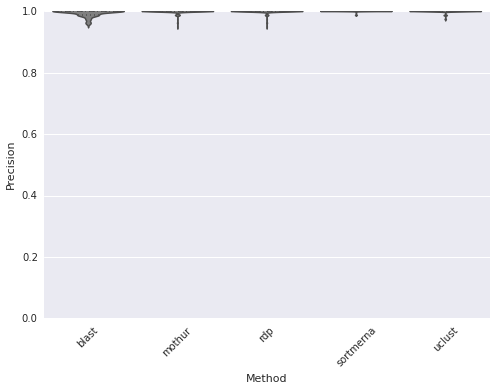

In [32]:
boxplot_from_data_frame(simulated_results, group_by="Method", metric="Precision")

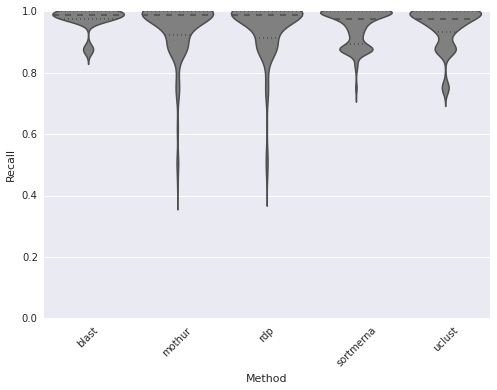

In [33]:
boxplot_from_data_frame(simulated_results, group_by="Method", metric="Recall")

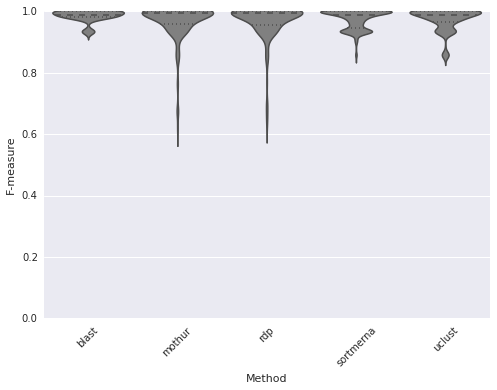

In [34]:
boxplot_from_data_frame(simulated_results, group_by="Method", metric="F-measure")

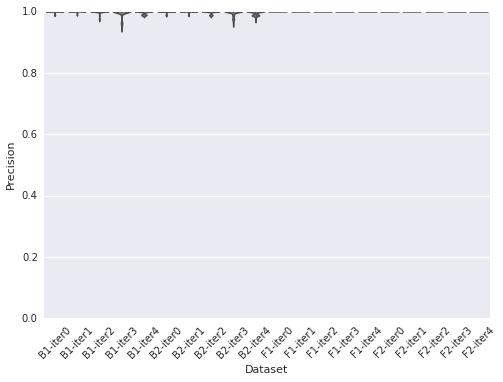

In [35]:
boxplot_from_data_frame(simulated_results, group_by="Dataset", metric="Precision")

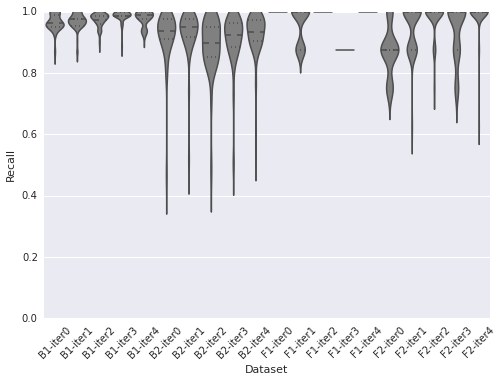

In [36]:
boxplot_from_data_frame(simulated_results, group_by="Dataset", metric="Recall")

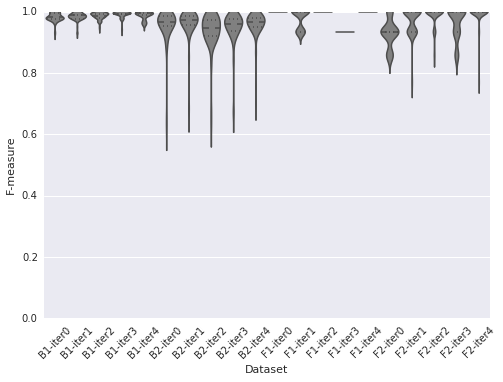

In [37]:
boxplot_from_data_frame(simulated_results, group_by="Dataset", metric="F-measure")

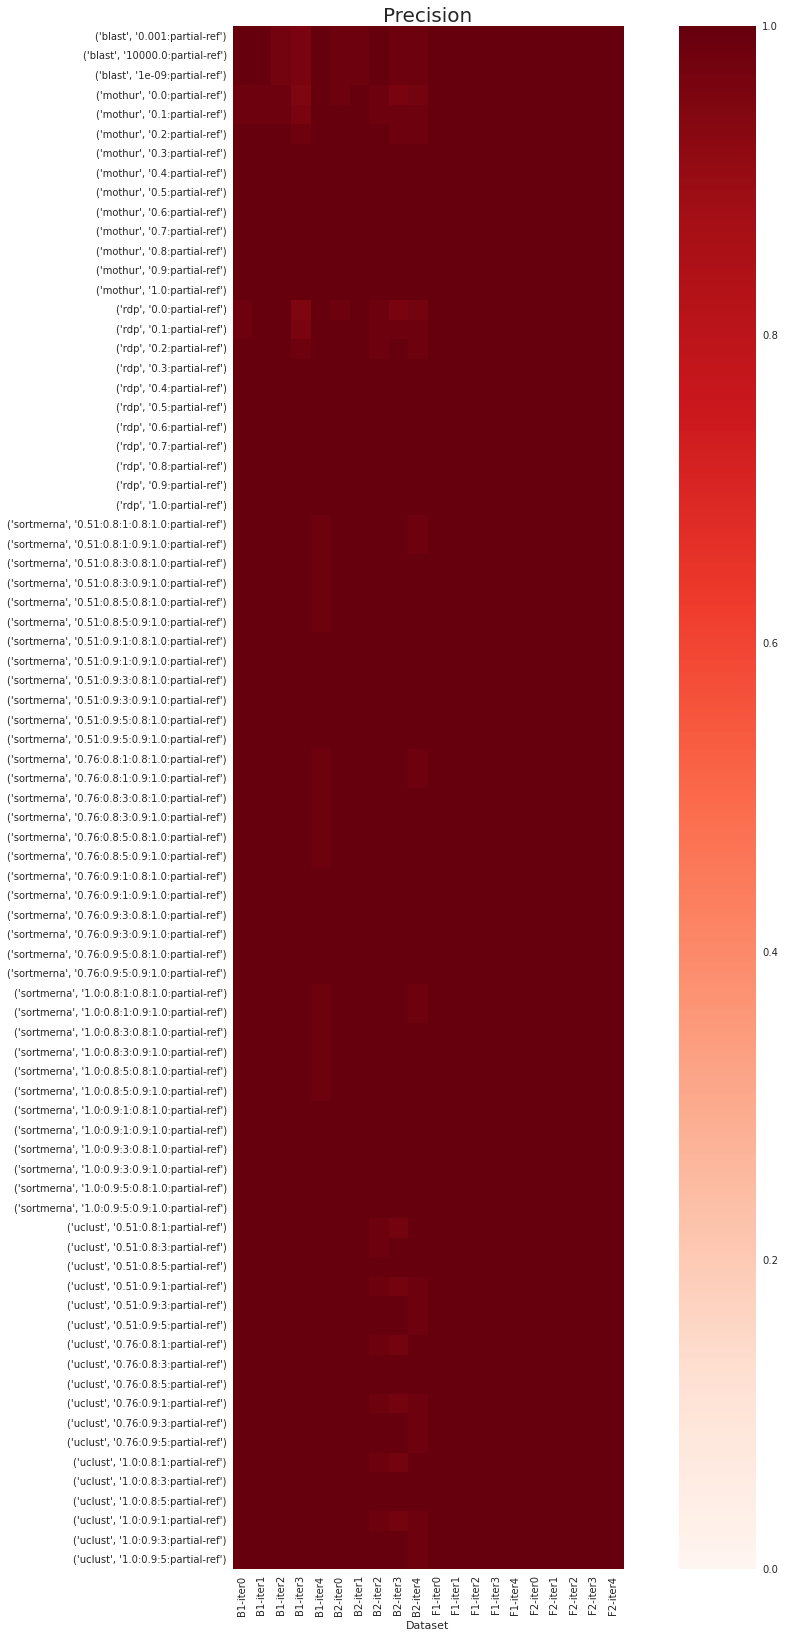

In [38]:
heatmap_from_data_frame(simulated_results, "Precision")

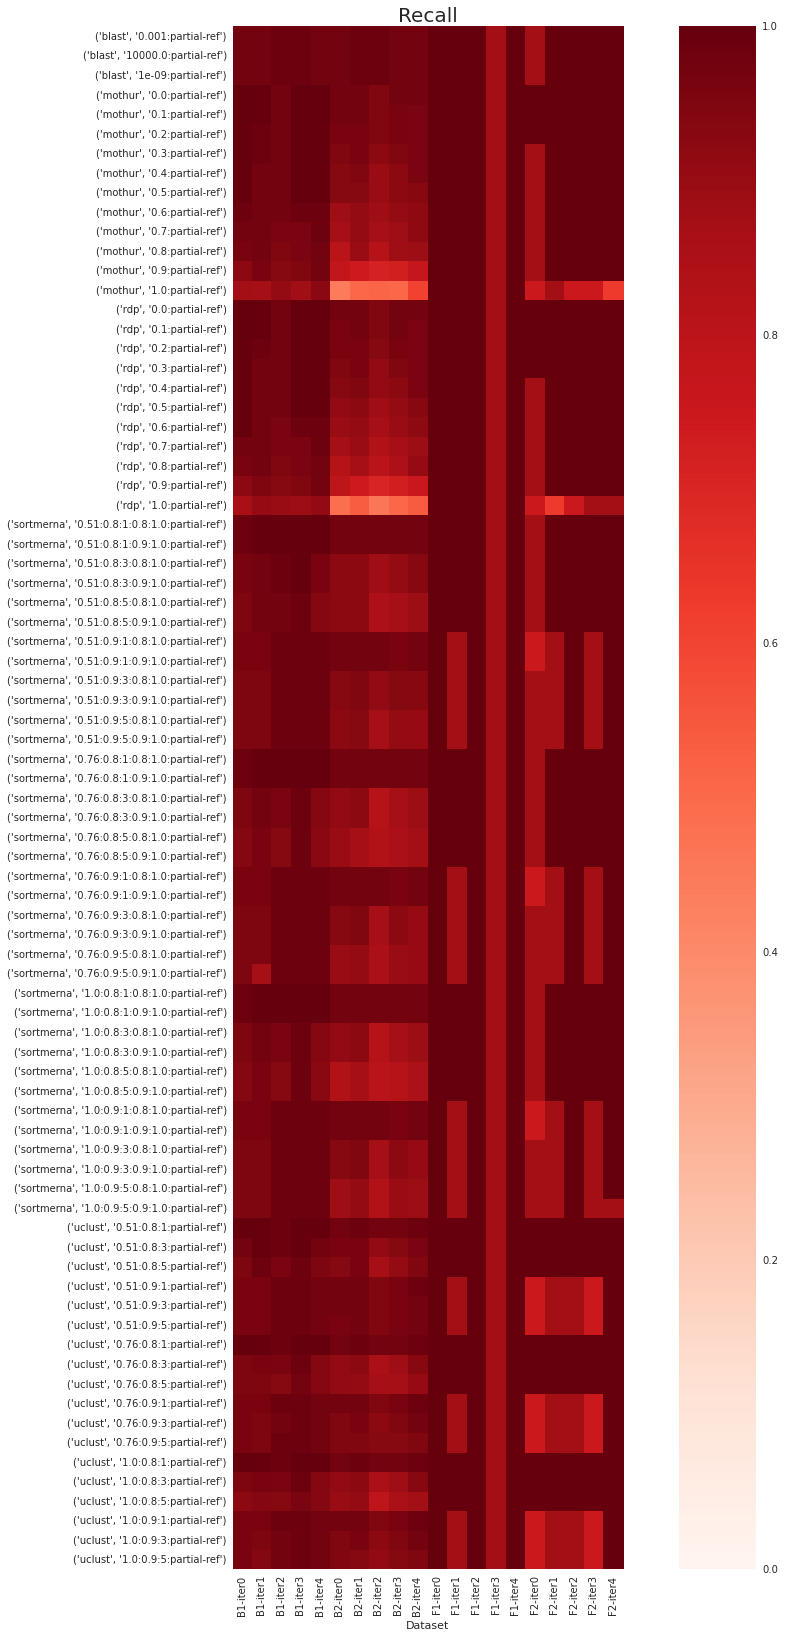

In [39]:
heatmap_from_data_frame(simulated_results, "Recall")

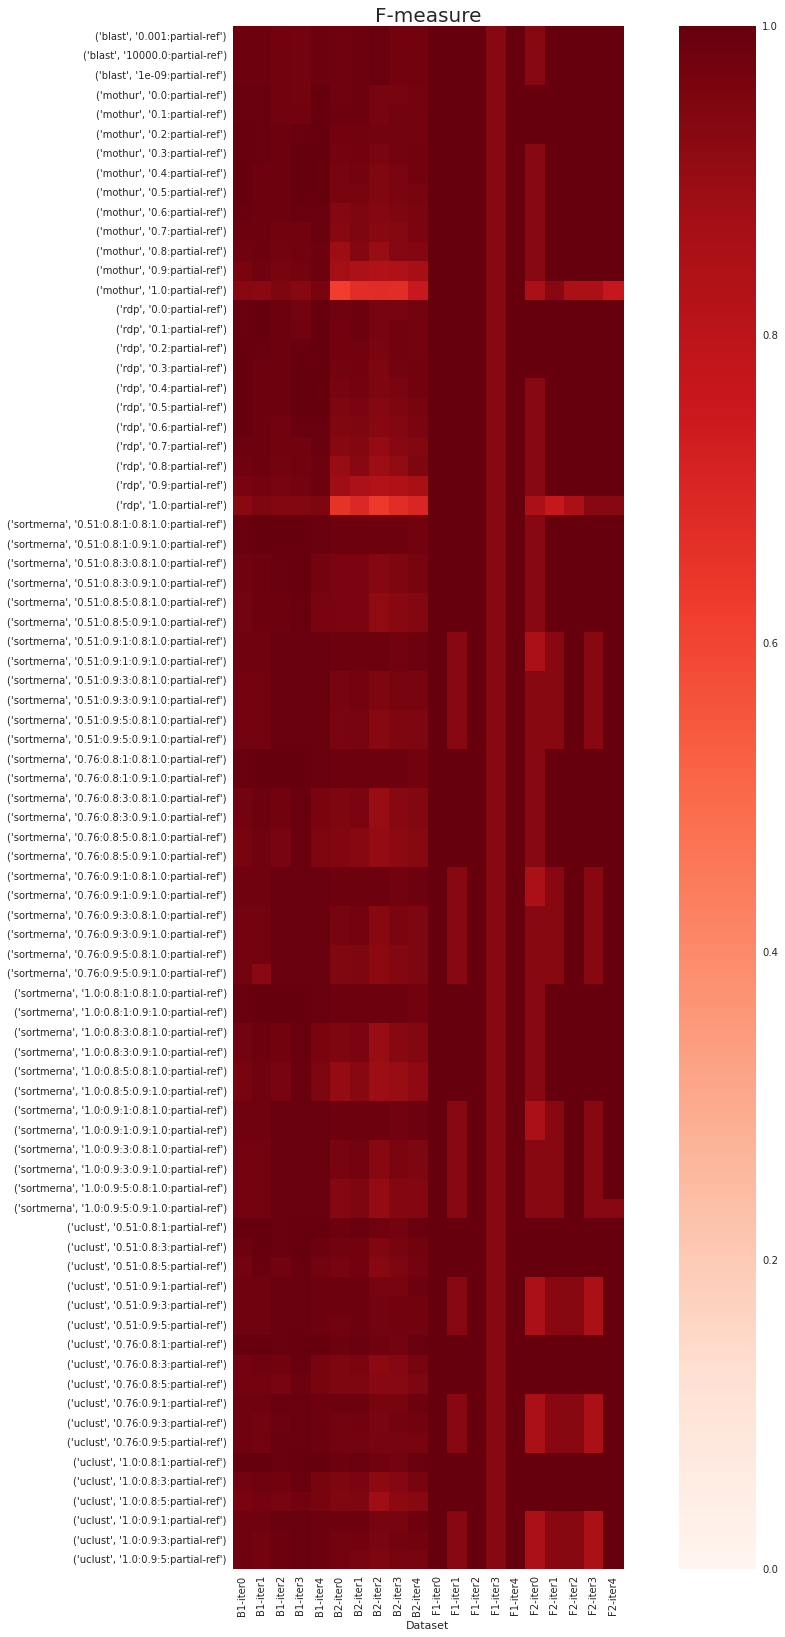

In [40]:
heatmap_from_data_frame(simulated_results, "F-measure")

In [41]:
method_by_dataset_a1(simulated_results, 'B1-iter0')

Method  Precision  Recall  F-measure
271      uclust          1  1.0000   1.000000
233         rdp          1  1.0000   1.000000
2761     mothur          1  1.0000   1.000000
182   sortmerna          1  0.9875   0.993711
213       blast          1  0.9750   0.987342

In [42]:
method_by_dataset_a1(simulated_results, 'B2-iter0')

Method  Precision    Recall  F-measure
2040  sortmerna   1.000000  0.974359   0.987013
2161     uclust   1.000000  0.974359   0.987013
3070     mothur   1.000000  0.974359   0.987013
2117      blast   0.987013  0.974359   0.980645
2118        rdp   0.987013  0.974359   0.980645

In [43]:
method_by_dataset_a1(simulated_results, 'F1-iter0')

Method  Precision  Recall  F-measure
1904  sortmerna          1       1          1
2005     uclust          1       1          1
2003        rdp          1       1          1
3030     mothur          1       1          1
1981      blast          1       1          1

In [44]:
method_by_dataset_a1(simulated_results, 'F2-iter0')

Method  Precision  Recall  F-measure
1166        rdp          1   1.000   1.000000
1218     uclust          1   1.000   1.000000
2900     mothur          1   1.000   1.000000
1160      blast          1   0.875   0.933333
1089  sortmerna          1   0.875   0.933333

## Evaluation 2: Rank-based statistics comparing the performance of the optimal parameter setting run for each method on each data set.

*Count best* column indicates how many samples a given method achieved the best result or tied for the best result (which is why they sum to more than the total number of samples).

### Within-method comparisons of parameter performance

In [45]:
rdp_top_params = parameter_comparisons(simulated_results, "rdp", metrics=['Precision', 'Recall', 'F-measure'])
rdp_top_params[:15]

F-measure  Precision  Recall       Mean
0.0:partial-ref         16         14      20  16.666667
0.1:partial-ref         16         15      18  16.333333
0.3:partial-ref         15         20      14  16.333333
0.4:partial-ref         14         20      13  15.666667
0.5:partial-ref         13         20      13  15.333333
0.2:partial-ref         13         17      14  14.666667
0.6:partial-ref         10         20      10  13.333333
0.7:partial-ref          9         20       9  12.666667
0.8:partial-ref          9         20       9  12.666667
0.9:partial-ref          9         20       9  12.666667
1.0:partial-ref          5         20       5  10.000000

In [46]:
uclust_top_params = parameter_comparisons(simulated_results, "uclust", metrics=['Precision', 'Recall', 'F-measure'])
uclust_top_params[:15]

F-measure  Precision  Recall       Mean
0.51:0.8:1:partial-ref         19         18      20  19.000000
1.0:0.8:1:partial-ref          19         18      20  19.000000
0.76:0.8:1:partial-ref         19         18      20  19.000000
0.51:0.8:3:partial-ref         13         19      13  15.000000
0.51:0.8:5:partial-ref         10         20      10  13.333333
1.0:0.8:5:partial-ref          10         20      10  13.333333
0.76:0.8:3:partial-ref         10         20      10  13.333333
0.76:0.8:5:partial-ref         10         20      10  13.333333
1.0:0.8:3:partial-ref          10         20      10  13.333333
0.51:0.9:3:partial-ref          8         19       7  11.333333
1.0:0.9:1:partial-ref           7         17       8  10.666667
0.76:0.9:1:partial-ref          7         17       8  10.666667
0.51:0.9:5:partial-ref          7         19       6  10.666667
0.51:0.9:1:partial-ref          7         17       8  10.666667
0.76:0.9:5:partial-ref          6         19       6  10.333333

In [47]:
sortmerna_top_params = parameter_comparisons(simulated_results, "sortmerna", metrics=['Precision', 'Recall', 'F-measure'])
sortmerna_top_params[:15]

F-measure  Precision  Recall       Mean
0.51:0.8:1:0.8:1.0:partial-ref         19         18      20  19.000000
0.76:0.8:1:0.8:1.0:partial-ref         19         18      20  19.000000
1.0:0.8:1:0.9:1.0:partial-ref          19         18      20  19.000000
1.0:0.8:1:0.8:1.0:partial-ref          19         18      20  19.000000
0.51:0.8:1:0.9:1.0:partial-ref         19         18      20  19.000000
0.76:0.8:1:0.9:1.0:partial-ref         19         18      20  19.000000
0.51:0.8:3:0.8:1.0:partial-ref         11         19      11  13.666667
0.51:0.8:3:0.9:1.0:partial-ref         11         19      11  13.666667
1.0:0.9:1:0.9:1.0:partial-ref          10         20      10  13.333333
1.0:0.9:1:0.8:1.0:partial-ref          10         20      10  13.333333
0.76:0.9:1:0.9:1.0:partial-ref         10         20      10  13.333333
0.76:0.9:1:0.8:1.0:partial-ref         10         20      10  13.333333
0.51:0.9:1:0.9:1.0:partial-ref         10         20      10  13.333333
0.51:0.9:1:0.8:1.0:partial-ref         10         20      10  13.333333
1.0:0.8:3:0.9:1.0:partial-ref          10         19      10  13.000000

In [48]:
blast_top_params = parameter_comparisons(simulated_results, "blast", metrics=['Precision', 'Recall', 'F-measure'])
blast_top_params[:15]

F-measure  Precision  Recall  Mean
0.001:partial-ref           20         20      20    20
10000.0:partial-ref         20         20      20    20
1e-09:partial-ref           20         20      20    20

In [49]:
mothur_top_params = parameter_comparisons(simulated_results, "mothur", metrics=['Precision', 'Recall', 'F-measure'])
mothur_top_params[:15]

F-measure  Precision  Recall       Mean
0.2:partial-ref         15         17      15  15.666667
0.3:partial-ref         14         20      13  15.666667
0.4:partial-ref         14         20      13  15.666667
0.1:partial-ref         15         13      18  15.333333
0.5:partial-ref         13         20      13  15.333333
0.0:partial-ref         13         12      20  15.000000
0.6:partial-ref         10         20      10  13.333333
0.7:partial-ref          9         20       9  12.666667
0.8:partial-ref          9         20       9  12.666667
0.9:partial-ref          9         20       9  12.666667
1.0:partial-ref          5         20       5  10.000000

### Between-method performance comparisons based on best parameter set determined above

In [50]:
mp_combs = {"rdp": rdp_top_params.index[0],
            "blast": blast_top_params.index[0], 
            "sortmerna": sortmerna_top_params.index[0],
            "uclust": uclust_top_params.index[0],
            "mothur": mothur_top_params.index[0]}

In [51]:
metric = 'Precision'
df = performance_rank_comparisons(simulated_results, metric, mp_combs)
if write_xls_files: 
    df.to_excel('tables/level%d_%s_rankstats.xlsx' % (taxonomic_level, metric), 
                                      na_rep='NA', float_format="%1.3f")
df

Count best  sortmerna: wilcoxon stat  sortmerna: wilcoxon p  \
sortmerna          18                       NaN                    NaN   
uclust             18                         4               0.715001   
mothur             17                         2               0.273322   
blast              14                         1               0.045800   
rdp                14                         1               0.027992   

           uclust: wilcoxon stat  uclust: wilcoxon p  mothur: wilcoxon stat  \
sortmerna                      4            0.715001                      2   
uclust                       NaN                 NaN                      3   
mothur                         3            0.465209                    NaN   
blast                          4            0.088659                      3   
rdp                            0            0.027708                      0   

           mothur: wilcoxon p  blast: wilcoxon stat  blast: wilcoxon p  \
sortmerna            0.273322                     1           0.045800   
uclust               0.465209                     4           0.088659   
mothur                    NaN                     3           0.114850   
blast                0.114850                   NaN                NaN   
rdp                  0.027708                    10           0.498962   

           rdp: wilcoxon stat  rdp: wilcoxon p  
sortmerna                   1         0.027992  
uclust                      0         0.027708  
mothur                      0         0.027708  
blast                      10         0.498962  
rdp                       NaN              NaN

In [52]:
metric = 'Recall'
df = performance_rank_comparisons(simulated_results, metric, mp_combs)
if write_xls_files: 
    df.to_excel('tables/level%d_%s_rankstats.xlsx' % (taxonomic_level, metric), 
                                      na_rep='NA', float_format="%1.3f")
df

Count best  uclust: wilcoxon stat  uclust: wilcoxon p  \
uclust             18                    NaN                 NaN   
rdp                16                      0            0.067889   
sortmerna          15                      3            0.224916   
blast              13                      1            0.027992   
mothur             13                      0            0.017960   

           rdp: wilcoxon stat  rdp: wilcoxon p  sortmerna: wilcoxon stat  \
uclust                      0         0.067889                         3   
rdp                       NaN              NaN                         5   
sortmerna                   5         1.000000                       NaN   
blast                      10         0.262618                         5   
mothur                      0         0.042168                        11   

           sortmerna: wilcoxon p  blast: wilcoxon stat  blast: wilcoxon p  \
uclust                  0.224916                     1           0.027992   
rdp                     1.000000                    10           0.262618   
sortmerna                    NaN                     5           0.128190   
blast                   0.128190                   NaN                NaN   
mothur                  0.172694                    32           0.929153   

           mothur: wilcoxon stat  mothur: wilcoxon p  
uclust                         0            0.017960  
rdp                            0            0.042168  
sortmerna                     11            0.172694  
blast                         32            0.929153  
mothur                       NaN                 NaN

In [53]:
metric = 'F-measure'
df = performance_rank_comparisons(simulated_results, metric, mp_combs)
if write_xls_files: 
    df.to_excel('tables/level%d_%s_rankstats.xlsx' % (taxonomic_level, metric), 
                                      na_rep='NA', float_format="%1.3f")
df

Count best  uclust: wilcoxon stat  uclust: wilcoxon p  \
uclust             17                    NaN                 NaN   
sortmerna          14                     14            0.575403   
mothur             12                      0            0.011719   
rdp                12                      0            0.011719   
blast              10                      8            0.026231   

           sortmerna: wilcoxon stat  sortmerna: wilcoxon p  \
uclust                           14               0.575403   
sortmerna                       NaN                    NaN   
mothur                           16               0.130665   
rdp                              12               0.213524   
blast                             7               0.066316   

           mothur: wilcoxon stat  mothur: wilcoxon p  rdp: wilcoxon stat  \
uclust                         0            0.011719                   0   
sortmerna                     16            0.130665                  12   
mothur                       NaN                 NaN                  14   
rdp                           14            0.575403                 NaN   
blast                         26            0.533695                  23   

           rdp: wilcoxon p  blast: wilcoxon stat  blast: wilcoxon p  
uclust            0.011719                     8           0.026231  
sortmerna         0.213524                     7           0.066316  
mothur            0.575403                    26           0.533695  
rdp                    NaN                    23           0.646462  
blast             0.646462                   NaN                NaN